In [ ]:
import nltk
import requests
from bs4 import BeautifulSoup


In [ ]:
initial_url = "https://www.bbc.com/news"
visited_urls = set()


In [ ]:
response = requests.get(initial_url)


In [ ]:
soup = BeautifulSoup(response.content, "html.parser")


In [ ]:
# Extract all the links from the HTML content
links = soup.find_all("a")

# Extract the title of the HTML page
title = soup.title.text

# Extract the body text of the HTML page
body_text = soup.get_text()


In [ ]:
visited_urls.add(initial_url)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 10 words for Graph 1 and their frequencies:
new: 279
says: 279
"large: 186
quantity": 186
narcotics: 186
found: 186
york: 186
nursery: 186
boy: 186
aged: 186


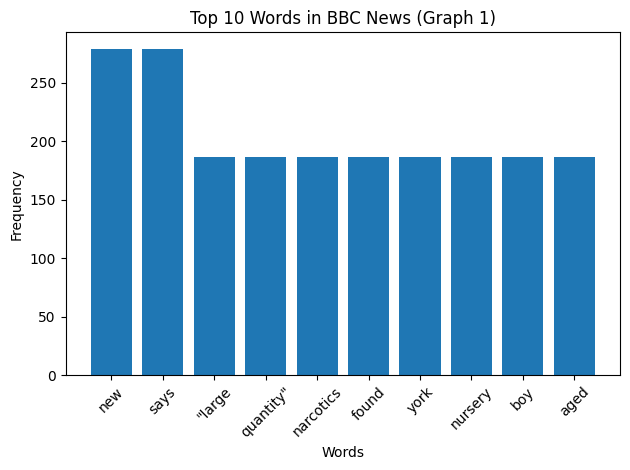

Top 10 words for Graph 2 and their frequencies:
new: 285
says: 285
"large: 190
quantity": 190
narcotics: 190
found: 190
york: 190
nursery: 190
boy: 190
aged: 190


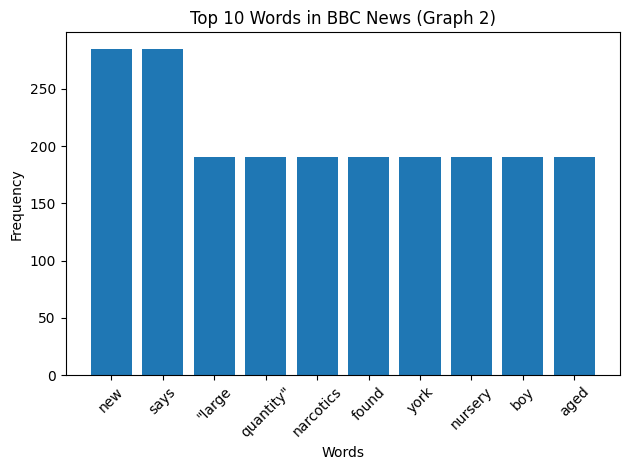

Top 10 words for Graph 3 and their frequencies:
new: 285
says: 285
"large: 190
quantity": 190
narcotics: 190
found: 190
york: 190
nursery: 190
boy: 190
aged: 190


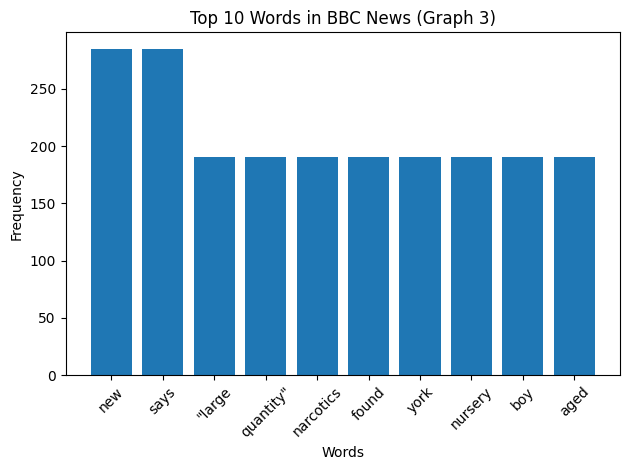

Top 10 words for Graph 4 and their frequencies:
new: 285
says: 285
"large: 190
quantity": 190
narcotics: 190
found: 190
york: 190
nursery: 190
boy: 190
aged: 190


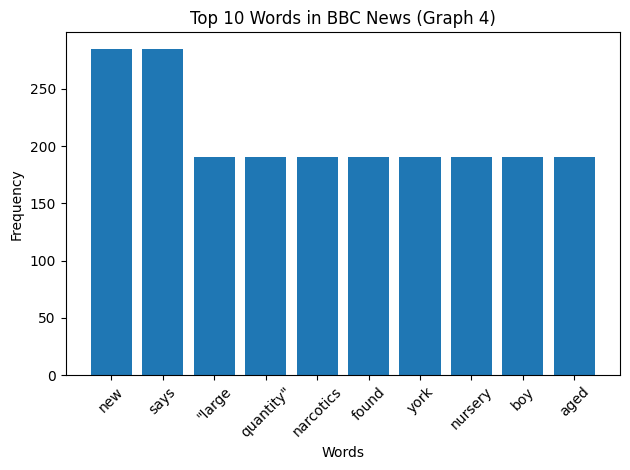

Top 10 words for Graph 5 and their frequencies:
new: 285
says: 285
"large: 190
quantity": 190
narcotics: 190
found: 190
york: 190
nursery: 190
boy: 190
aged: 190


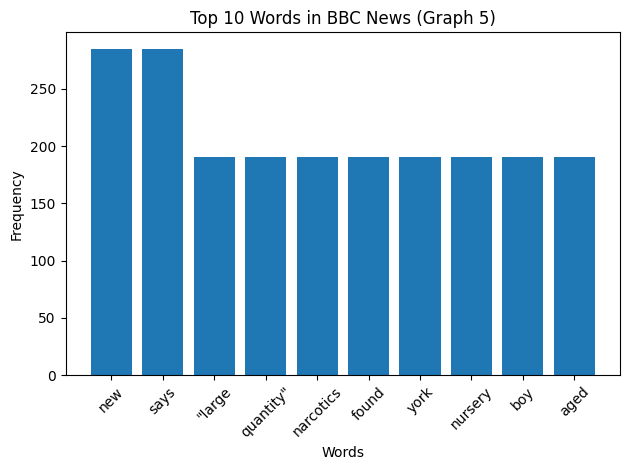

In [ ]:
import time
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download the NLTK stopwords resource
nltk.download('stopwords')

# Define a function to scrape the website and collect text data:
def scrape_bbc_news(url):
    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code != 200:
        print("Failed to retrieve the webpage.")
        return None

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find and extract text data
    article_text = ''
    for paragraph in soup.find_all('p'):
        article_text += paragraph.get_text() + ' '

    return article_text

# Define a function to preprocess the text and find the 10 most frequent words:
def get_top_words(text, num_words=10):
    # Tokenize the text into words
    words = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word.lower() for word in words if word.lower() not in stop_words]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the top N words
    top_words = word_counts.most_common(num_words)

    return top_words

if __name__ == "__main__":
    bbc_url = "https://www.bbc.com/news"

    for graph_number in range(5):
        # Collect words for 2 minutes
        start_time = time.time()
        end_time = start_time + (2 * 60)  # 2 minutes in seconds

        words_collected = []  # Store collected words during this period

        while time.time() < end_time:
            # Scrape the website
            article_text = scrape_bbc_news(bbc_url)

            if article_text:
                # Tokenize and collect words
                words = article_text.split()
                words_collected.extend(words)

            # Wait for a short interval between requests
            time.sleep(1)

        # Get the top 10 words from the collected data
        top_words = get_top_words(" ".join(words_collected), num_words=10)

        # Display the top words
        print(f"Top 10 words for Graph {graph_number + 1} and their frequencies:")
        for word, freq in top_words:
            print(f"{word}: {freq}")

        # Create a bar chart of the top words
        words, frequencies = zip(*top_words)
        plt.bar(words, frequencies)
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.title(f"Top 10 Words in BBC News (Graph {graph_number + 1})")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Wait for 10 minutes before the next graph
        if graph_number < 4:
            time.sleep(10 * 60)  # 10 minutes in seconds
